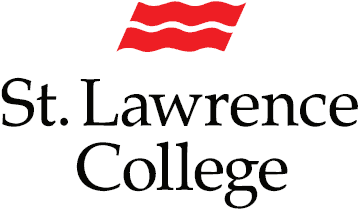
## ADMN5015: Artificial Intelligence in Marketing
### Regression Project
Maria Isabel Dio Grau

<i>This Python notebook contains a combination of markdown text and code block comments that explain the tasks being executed.</i><br>
***
This program aims to perform the following tasks (each line is linked to the code block that executes the corresponding step):
1. <a href='#extract'>Extract data</a>
2. <a href='#createdf'>Create a dataset using the extracted data</a>
3. <a href='#csv'>Save the dataset as a csv</a>
4. Upload csv file to Github (This step is done manually, but is necessary in order to execute step 5.)
5. <a href='#downloadcsv'>Download the csv file from Github</a>
6. <a href='#processing'>Process data</a>
7. <a href='#regression'>Perform a regression analysis, with price as the dependent variable</a>
8. <a href='#predict'>Predict the price for the next date</a>


Before running the program, packages must first be imported in order to access the various functions used by the codes below. If necessary, the packages must first be installed with `pip install [package name]`

In [5]:
from bs4 import BeautifulSoup
from lxml import etree
import urllib.request as urllib2
import datetime
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

<a id='extract'></a>
### Extract data from URLs

In [136]:
# Initialize parser

parser = etree.HTMLParser()

Set timeframe: January 1, 2019 to December 31, 2022

A total of 1,461 URLs will be used for this dataset, with each URL representing a date within the timeframe.

Since `startdate` and `enddate` are <i>not</i> numeric variables, we are unable to add a number (i.e., `startdate + 1`). To get the next date in the range of dates, the variable `day` is initialized below, which increments the dates by 1 day. Since all three variables - `startdate`, `enddate`, `day` - are from the same datetime module, operations can be performed using combinations of these variables.

In [139]:
startdate = datetime.date(2019,1,1)
enddate = datetime.date(2022,12,31)
day = datetime.timedelta(days=1)

<b>Lists</b> are Python objects that can store other objects - in this case, the data extracted from the URLs. Since five values are extracted from each URL - date, price, likes, dislikes, followers - five <i>empty</i> lists are initialized below. As the code runs through the `while` loop, the lists are appended - i.e, data is added.

<b>NOTE: Because of how the server is structured, there are times when the data cannot be extracted. I saved a copy of the complete dataset (when the loop ran successfully) in [my github repository](https://github.com/isabelgrau/ADMN5015-AI-in-Marketing). </b>

<b>If the loop does not run successfully, please jump to <a href='#downloadcsv'>this section</a> to proceed to the regression analysis using the full dataset from my github repository.</b>

In [140]:
date = []
price = []
likes = []
dislikes = []
followers = []

while startdate <= enddate:
    try:
        url = "https://admn5015-340805.uc.r.appspot.com/" + str(startdate) + ".html"
        webpage = urllib2.urlopen(url, timeout=10)
        soup = BeautifulSoup(webpage.read(), "html.parser", from_encoding="utf-8")

        date.append(soup.find("td", {"id": "date"}).text)

        amount = soup.find("td", {"id": "price"}).text
        amount = amount.replace("$ ","").replace(" CAD","")
        price.append(amount)

        likes.append(soup.find("td", {"id": "likes"}).text)
        dislikes.append(soup.find("td", {"id": "dislikes"}).text)
        followers.append(soup.find("td", {"id": "followers"}).text)
    except:
        print(url + " did not work")

    startdate = startdate + day

if startdate - day == enddate:
    print("Data extracted.")

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


https://admn5015-340805.uc.r.appspot.com/2022-12-31.html did not work
Data extracted.


<b>Note</b>:<br>
The original code taught in class for extracting data was as follows:
>html = webpage.read().decode(encoding="utf-8")<br>
soup = BeautifulSoup(html, "html.parser")

However, this sometimes throws the error ```'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte loop```, especially when added in a loop. As an alternative, I used the following code, which combines both lines into one:
>soup = BeautifulSoup(webpage.read(), "html.parser", from_encoding="utf-8")

<a id='createdf'></a>
### Create a dataframe using extracted data

<b> NOTE: Because the last run of the loop above was unsuccessful, the ```table``` dataframe below is incomplete. A complete dataset can be found in [my github repository](https://github.com/isabelgrau/ADMN5015-AI-in-Marketing).</b>

In [141]:
table = pd.DataFrame({
    "date": date,
    "price": price,
    "likes": likes,
    "dislikes": dislikes,
    "followers": followers
})

Check first and last few rows to make sure that the correct data was extracted, columns are organized, and that there are 1,461 rows.

In [142]:
table.head()

,date,price,likes,dislikes,followers
0,2019-01-01,999.47,9001,401,15002
1,2019-01-02,998.94,9002,402,15004
2,2019-01-03,998.41,9003,403,15006
3,2019-01-04,997.88,9004,404,15008
4,2019-01-05,997.35,9005,405,15010


In [143]:
table.tail()

,date,price,likes,dislikes,followers
1455,2022-12-26,22452.8,10924,1496,17468
1456,2022-12-27,22452.8,10924,1496,17468
1457,2022-12-28,22452.8,10924,1496,17468
1458,2022-12-29,22452.8,10924,1496,17468
1459,2022-12-30,22452.8,10924,1496,17468


<a id='csv'></a>
### Save as csv file

In [144]:
table.to_csv("admn5015_regression_dataset.csv", encoding='utf-8', index=False)

<a id='downloadcsv'></a>
### Download csv from Github as a dataframe

In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/isabelgrau/ADMN5015-AI-in-Marketing/main/admn5015_regression_dataset.csv")

Check first and last few rows to make sure that the correct data was extracted, columns are organized, and that there are 1,461 rows.

In [27]:
df.head()

,date,price,likes,dislikes,followers
0,2019-01-01,999.47,9001,401,15002
1,2019-01-02,998.94,9002,402,15004
2,2019-01-03,998.41,9003,403,15006
3,2019-01-04,997.88,9004,404,15008
4,2019-01-05,997.35,9005,405,15010


In [28]:
df.tail()

,date,price,likes,dislikes,followers
1456,2022-12-27,22452.8,10924,1496,17468
1457,2022-12-28,22452.8,10924,1496,17468
1458,2022-12-29,22452.8,10924,1496,17468
1459,2022-12-30,22452.8,10924,1496,17468
1460,2022-12-31,22452.8,10924,1496,17468


<a id='processing'></a>
### Data processing

In [129]:
# Add column 'day' corresponding to each date

df['day'] = df.index

In [130]:
# Examine data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1461.0,11167.313854,8574.937328,855.31,1362.78,14193.74,22452.8,22452.8
likes,1461.0,10125.540041,662.219848,9001.00,9642.00,10283.00,10924.0,10924.0
dislikes,1461.0,1085.281314,362.438436,401.00,766.00,1131.00,1496.0,1496.0
followers,1461.0,16517.315537,824.037689,15002.00,15824.00,16646.00,17468.0,17468.0
day,1461.0,730.000000,421.898685,0.00,365.00,730.00,1095.0,1460.0


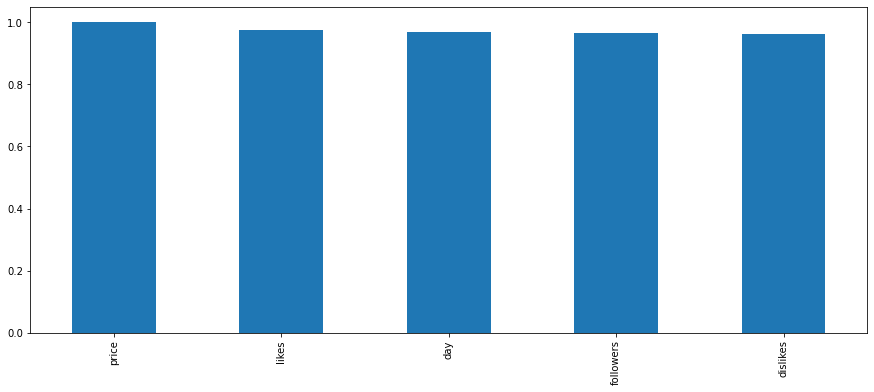

In [131]:
# Plot data 

plt.figure(figsize=(15,6))
bars = df.corr()['price'].sort_values(ascending=False).plot(kind='bar')

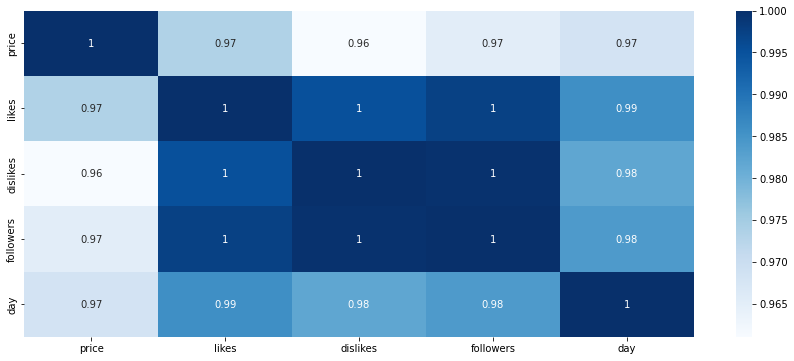

In [132]:
# Create a heatmap

plt.figure(figsize=(15,6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="Blues")

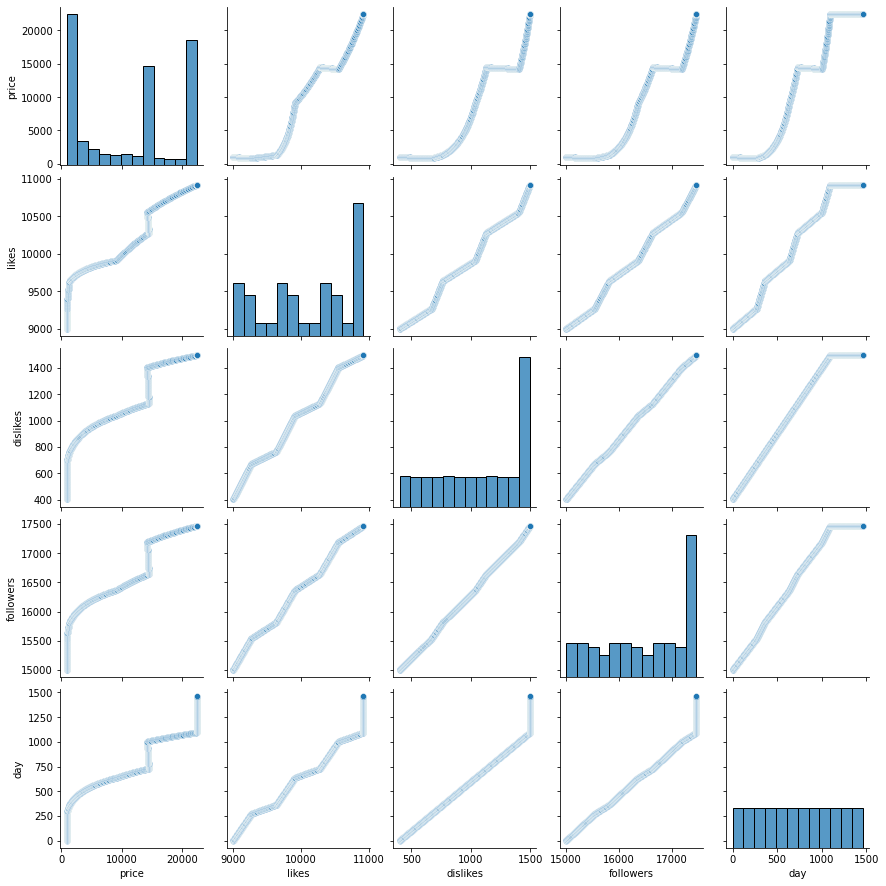

In [133]:
sns.pairplot(df)

The visualizations above show that all variables are strongly positively correlated with price.

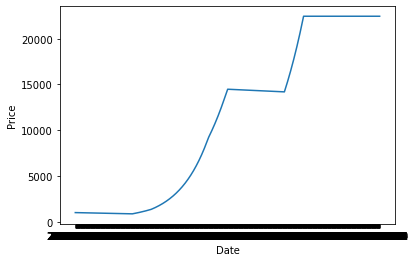

In [134]:
plt.plot(df['date'], df['price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

There does not seem to be a pattern in price over time. It was relatively flat in 2019, then increased exponentially in 2020. After its exponential increase, it remained flat in 2021. There was a sudden increase at the beginning of 2022, but it remained stable throughout the year.

Exploratory analysis shows that the date is not likely to be a good predictor. To confirm whether or not this is accurate, the regression analysis that follows compares two sets of predictor variables - with and without dates (represented by the column ```day```).

<a id='regression'></a>
### Regression analysis

In [62]:
# Create traning and testing datasets

x1 = df[['likes', 'dislikes', 'followers', 'day']] # With day as one of the predictor variables 
x2 = df[['likes', 'dislikes', 'followers']] # Without day as one of the predictor variables 
y = df['price']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=0) # With dates
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size=0.3, random_state=0) # Without dates

In [63]:
# Identify the best model

regressors = {
    "XGBRegressor": XGBRegressor(silent=True),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "Ridge":Ridge(),
    "Lars": Lars(),
    "TheilSenRegressor": TheilSenRegressor(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
}


<b>With ```day``` as a predictor variable:</b>

In [64]:
df_models_1 = pd.DataFrame(columns=['model', 'run_time', 'rmse'])

for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(x1_train, y1_train)
    y1_pred = model.predict(x1_test)

    scores = cross_val_score(model, 
                             x1_train, 
                             y1_train,
                             scoring="neg_mean_squared_error", 
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y1_test, y1_pred)))
    }

    df_models_1 = df_models_1.append(row, ignore_index=True)

* XGBRegressor
[21:21:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:21:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:21:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1522952940.5938444, tolerance: 7441818.225228856
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1345632870.5160952, tolerance: 6755559.401193802
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1387049296.5679069, tolerance: 6657474.864818096
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

In [65]:
# Order model results

df_models_1.head(20).sort_values(by='rmse', ascending=True)

,model,run_time,rmse
1,RandomForestRegressor,0.03,20
2,DecisionTreeRegressor,0.0,34
0,XGBRegressor,0.01,36
6,Ridge,0.0,1804
7,Lars,0.0,1804
13,ElasticNet,0.0,1804
11,ARDRegression,0.0,1805
12,BayesianRidge,0.0,1805
8,TheilSenRegressor,0.08,1833
14,OrthogonalMatchingPursuit,0.0,2035


<b>Without ```day``` as a predictor variable:</b>

In [66]:
df_models_2 = pd.DataFrame(columns=['model', 'run_time', 'rmse'])

for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(x2_train, y2_train)
    y2_pred = model.predict(x2_test)

    scores = cross_val_score(model, 
                             x2_train, 
                             y2_train,
                             scoring="neg_mean_squared_error", 
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y2_test, y2_pred)))
    }

    df_models_2 = df_models_2.append(row, ignore_index=True)

* XGBRegressor
[21:21:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:21:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:21:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1629259863.170863, tolerance: 7441818.225228856
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1441575507.0766218, tolerance: 6755559.401193802
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1482857600.3419611, tolerance: 6657474.864818096
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

In [67]:
# Order model results

df_models_2.head(20).sort_values(by='rmse', ascending=True)

,model,run_time,rmse
1,RandomForestRegressor,0.03,20
2,DecisionTreeRegressor,0.0,34
0,XGBRegressor,0.01,36
6,Ridge,0.0,1867
7,Lars,0.0,1867
11,ARDRegression,0.0,1867
12,BayesianRidge,0.0,1867
13,ElasticNet,0.0,1867
8,TheilSenRegressor,0.08,1880
14,OrthogonalMatchingPursuit,0.0,2035


The <b>Root Mean Square Error (RMSE)</b> is a measure of model accuracy. The lower the RMSE, the better because this indicates that there are low errors between the actual values and the predicted values. The <b>RandomForestRegressor</b> had the lowest RMSE for both sets of predictor variables (with and without the ```day``` column). However, both have an RMSE of 20, which means that ```day``` has no predictive power* in the regression since the accuracy did not improve.

In the codes that follow, I will be using the RandomForestRegressor <i>without</i> dates a predictor variable in predicting the next price.

*<i>Further statistical analysis is needed to confirm this.</i>

In [69]:
# Assess the best model

regressor = RandomForestRegressor()
model = regressor.fit(x2_train, y2_train)
y2_pred = model.predict(x2_test)

In [93]:
# Compare actual and predicted prices

test = pd.DataFrame({'Predicted price':y2_pred, 'Actual price':y2_test})
test = test.reset_index()
test = test.drop(['index'],axis=1)
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Predicted price,439.0,11155.955704,8670.845191,856.297,1490.1287,14193.3698,22452.8,22452.8
Actual price,439.0,11161.494032,8671.443153,855.840,1497.5950,14191.4300,22452.8,22452.8


Because the RMSE is low and the range of prices is high (values range from ~850 to ~22450), differences in predicted and actual values are not easily seen in a line plot. For ease of comparison, below are two line plots - one for values < 1500 (below first quartile) and one for values > 14200 (above median).

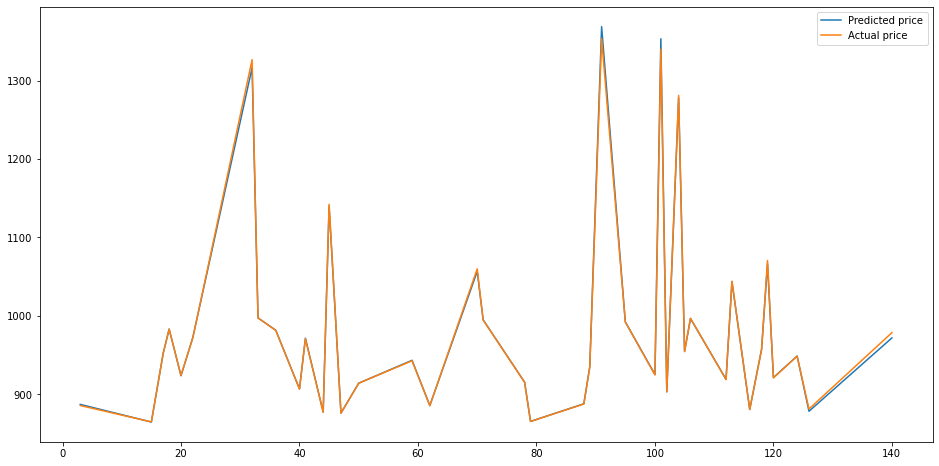

In [107]:
test_low = test[(test['Predicted price'] < 1500) | (test['Actual price'] < 1500)]
fig= plt.figure(figsize=(16,8))
plt.plot(test_low[:40])
plt.legend(['Predicted price','Actual price'])

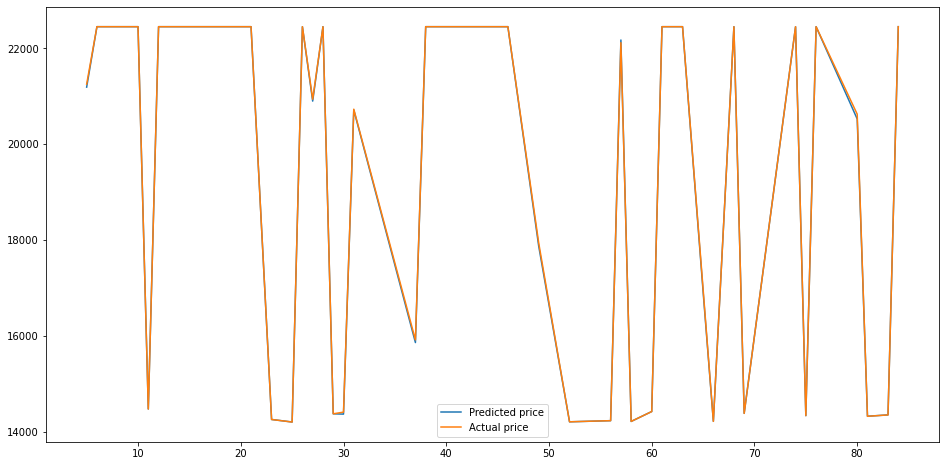

In [108]:
test_high = test[(test['Predicted price'] > 14200) | (test['Actual price'] > 14200)]
fig= plt.figure(figsize=(16,8))
plt.plot(test_high[:40])
plt.legend(['Predicted price','Actual price'])

<a id='predict'></a>
### Prediction

Although date was not used as a predictor variable, the variables below are the assumed values <b>as of January 1, 2023</b>.

The table below shows that throughout 2022, values for all variables did <b>not</b> change. It is highly likely that the number of likes, dislikes, and followers will remain the same on January 1, 2023.

In [117]:
# 2022 values

df2022 = df[df['date'].str[:4] == '2022']
df2022.describe().T

,count,mean,std,min,25%,50%,75%,max
price,365.0,22452.8,1.311470e-10,22452.8,22452.8,22452.8,22452.8,22452.8
likes,365.0,10924.0,0.000000e+00,10924.0,10924.0,10924.0,10924.0,10924.0
dislikes,365.0,1496.0,0.000000e+00,1496.0,1496.0,1496.0,1496.0,1496.0
followers,365.0,17468.0,0.000000e+00,17468.0,17468.0,17468.0,17468.0,17468.0
day,365.0,1278.0,1.055107e+02,1096.0,1187.0,1278.0,1369.0,1460.0


In [118]:
df2022.tail()

,date,price,likes,dislikes,followers,day
1456,2022-12-27,22452.8,10924,1496,17468,1456
1457,2022-12-28,22452.8,10924,1496,17468,1457
1458,2022-12-29,22452.8,10924,1496,17468,1458
1459,2022-12-30,22452.8,10924,1496,17468,1459
1460,2022-12-31,22452.8,10924,1496,17468,1460


In [126]:
# Scenario 1: All predictor variables will stay the same as the values as of December 31, 2022

temp_data = {'likes' : [10924],
             'dislikes' : [1496],
             'followers' : [17468]
            }

df_price_input = pd.DataFrame(temp_data, columns = ['likes', 'dislikes', 'followers'])
df_price_prediction_result = model.predict(df_price_input)
print("The predicted price is $ " + str(df_price_prediction_result) + " CAD.")

The predicted price is $ [22452.8] CAD.


Because price was steady throughout 2022 and because the model has a low RMSE, a price prediction that is exactly the same as the price in 2022 is unsurprising.

The table below shows that the last price change was on December 30, 2021, when the price increased from 22,341.09 to 22,452.80. The following changes were also observed between December 30, 2021 and December 31, 2021:
>Likes increased by 4<br>
Dislikes increased by 1<br>
Followers increased by 3

In [135]:
df[(df['day'] > 1090) & (df['day'] < 1100)]

,date,price,likes,dislikes,followers,day
1091,2021-12-27,22009.29,10908,1492,17456,1091
1092,2021-12-28,22119.34,10912,1493,17459,1092
1093,2021-12-29,22229.94,10916,1494,17462,1093
1094,2021-12-30,22341.09,10920,1495,17465,1094
1095,2021-12-31,22452.80,10924,1496,17468,1095
1096,2022-01-01,22452.80,10924,1496,17468,1096
1097,2022-01-02,22452.80,10924,1496,17468,1097
1098,2022-01-03,22452.80,10924,1496,17468,1098
1099,2022-01-04,22452.80,10924,1496,17468,1099


Scenario 2 assumes that these three variables change by the same amount on January 1, 2023.

In [127]:
# Scenario 2: All predictor variables change by the same amounts indicated above

temp_data = {'likes' : [10928],
             'dislikes' : [1497],
             'followers' : [17471]
            }

df_price_input = pd.DataFrame(temp_data, columns = ['likes', 'dislikes', 'followers'])
df_price_prediction_result = model.predict(df_price_input)
print("The predicted price is $ " + str(df_price_prediction_result) + " CAD.")

The predicted price is $ [22452.8] CAD.


Scenario 2 shows that even with the same changes in the three variables, the price is predicted to remain the same.